In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

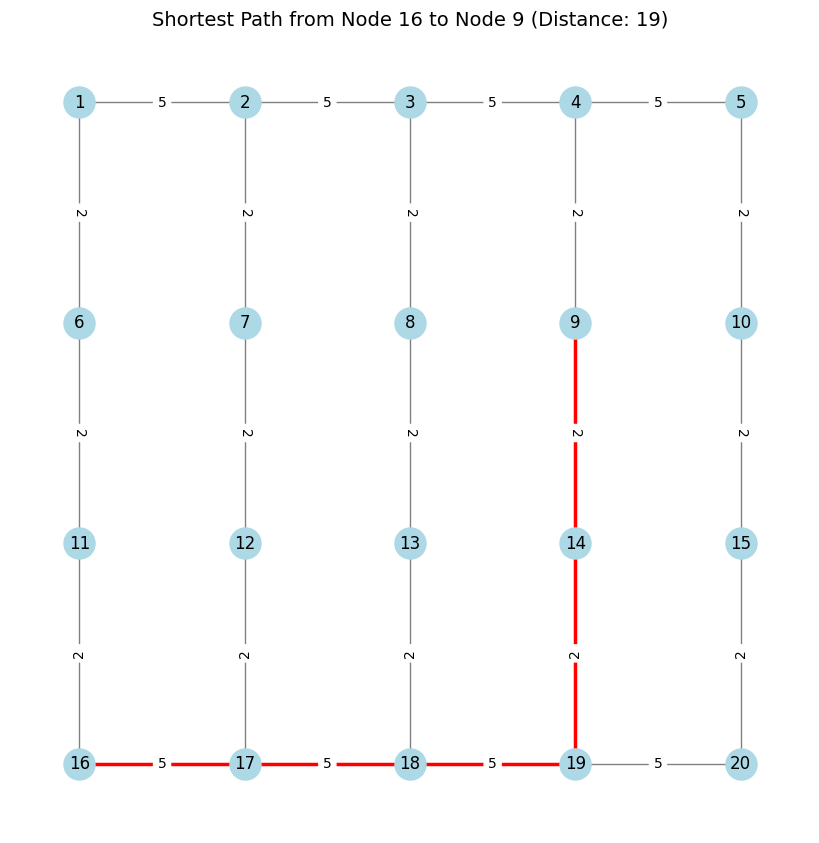

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.Graph()

# Define grid dimensions
n = 5  # Number of rows
m = 4  # Number of columns

# Add edges within rows
for i in range(1, n):
    G.add_edge(i, i + 1, weight=5)

for i in range(n * m - n + 1, n * m):
    G.add_edge(i, i + 1, weight=5)

# Add edges between rows
for i in range(1, n * m - n + 1):
    G.add_edge(i, i + n, weight=2)

# Visualize the graph
pos = {}
for row in range(m):  # m is the number of rows
    for col in range(n):  # n is the number of columns
        node = row * n + col + 1
        pos[node] = (col, -row)  # Arrange nodes in a square grid


# Compute the shortest path between node 16 and node 9
shortest_path = nx.shortest_path(G, source=16, target=9, weight="weight")
shortest_path_edges = list(zip(shortest_path, shortest_path[1:]))

# Highlight the shortest path in the visualization
plt.figure(figsize=(8, 8))
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=500,
    node_color="lightblue",
    edge_color="gray",
)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=shortest_path_edges,
    edge_color="red",
    width=2.5,
)
nx.draw_networkx_edge_labels(
    G,
    pos,
    edge_labels={(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)},
    font_size=10,
    label_pos=0.5,
)

# Display the shortest path length
shortest_path_length = nx.shortest_path_length(G, source=16, target=9, weight="weight")
plt.title(
    f"Shortest Path from Node 16 to Node 9 (Distance: {shortest_path_length})",
    fontsize=14,
)
plt.axis("off")
plt.show()

In [3]:
# Traveling Salesman applied to a pickup list
pickup_list = [1, 7, 12, 11, 8]

tsp = nx.approximation.traveling_salesman_problem
tsp_route = tsp(G, nodes=pickup_list)
tsp_distance = sum(G[u][v]["weight"] for u, v in zip(tsp_route, tsp_route[1:]))
seen = set()
order = [
    node
    for node in tsp_route
    if node in pickup_list and not (node in seen or seen.add(node))
][1:]


tsp_route, tsp_distance, order

([1, 2, 7, 12, 7, 2, 3, 8, 13, 18, 17, 16, 11, 6, 1], 40, [7, 12, 8, 11])